## Word Count

In [1]:
import string #importing required modules

In [2]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setAppName("WordCountApp")
sc = SparkContext(conf=conf)#setting up Spark Context


In [3]:
!pip install pyngrok

In [4]:
import pyngrok # import the pyngrok module
from pyngrok import ngrok
from pyspark.sql import SparkSession

In [5]:
#importing nltk to get the stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stop_words = set(stopwords.words('english'))
print(nltk_stop_words)

{'below', 'there', 'm', 'all', "she's", 'am', 'been', 'against', 'only', 'wouldn', 'few', 'in', 'yours', 'it', "you're", 'more', 'at', "hasn't", 'of', 've', "weren't", 'before', "wasn't", 'her', 'after', 'just', 'your', 'not', 'mustn', 'down', 'by', "shan't", 'other', 'once', 'than', "haven't", 'd', 'each', 'did', "didn't", 'with', 'can', 'between', 'here', "aren't", 'or', 'under', 'very', 'shan', 'where', 'why', 'the', 'for', 'about', 'but', 'myself', 'a', 'do', "you'd", 'had', 'out', 'shouldn', 'this', 'that', 'herself', 'those', 'ma', 'until', "wouldn't", 'they', 'any', 'aren', "mightn't", 'yourselves', "don't", 'y', 'an', 'should', "it's", 'so', 'o', 'during', 't', 'them', 'is', 'yourself', 'be', "you've", 'what', 'we', 'ain', 'were', 'on', 'into', 'while', 'you', 'couldn', 'my', "you'll", 'up', "mustn't", 'our', 'which', 'i', 'when', 'some', 'ours', 'whom', 'because', "should've", 'their', 'll', "isn't", 'as', 'hasn', 'having', "shouldn't", 'these', 'are', 'such', 'now', 're', 'ha

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Loading and Combining Text Files

In [6]:
DIC_Word_Count_1 = sc.textFile("DIC_Word_Count_1.txt")
DIC_Word_Count_2 = sc.textFile("DIC_Word_Count_2.txt")
text_rdd = DIC_Word_Count_1.union(DIC_Word_Count_2)


### Basic Word Count Code

In [7]:
# Splitting each line into words and mapping each word to a (word, 1) pair
word_pairs_rdd_basic = text_rdd.flatMap(lambda line: line.split()).map(lambda word: (word, 1))

# Reduce by key to count occurrences of each word
word_count_rdd_basic = word_pairs_rdd_basic.reduceByKey(lambda a, b: a + b)

# Collecting the results
basic_word_counts = word_count_rdd_basic.collect()

### Extended Word Count Code

Defining a function to make the lines lower case, to remove punctuations and filter the stop words

In [8]:
# Defining a function to preprocess the content
def preprocess_text(line):
    line = line.lower() #changing to lowercase
    translator = str.maketrans("", "", string.punctuation + "“”‘’")
    cleaned_line = line.translate(translator) #Cleaning up punctuations
    words = cleaned_line.split() #Splitting the lines to words
    filtered_words = filter(lambda word: word not in nltk_stop_words, words) #Filtering out stop words
    return filtered_words

### Applying preprocess_text function and Transforming Words into Pairs

In [9]:
words_rdd = text_rdd.flatMap(preprocess_text)
word_pairs_rdd = words_rdd.map(lambda word: (word, 1))


### Counting Words with reduceByKey and Sorting the word counts

In [10]:
word_count_rdd = word_pairs_rdd.reduceByKey(lambda a, b: a + b)
sorted_word_count_rdd = word_count_rdd.sortBy(lambda x: (-x[1], x[0]))


### Saving the Extended code output

In [11]:
Extended_word_counts = sorted_word_count_rdd.collect()

with open("output_1_extended.txt", "w") as outfile:
    outfile.write("[")  # Start of list
    outfile.write(", ".join(f"({repr(word)}, {count})" for word, count in Extended_word_counts))
    outfile.write("]")  # End of list

print("Output saved as output_1_extended.txt in list format")


Output saved as output_1_extended.txt in list format


### Saving basic code ouput

In [16]:
with open("output_1.txt", "w") as outfile:
    outfile.write("[")  # Start of list
    outfile.write(", ".join(f"({repr(word)}, {count})" for word, count in basic_word_counts))
    outfile.write("]")  # End of list

print("Output saved as output.txt in list format")


Output saved as output.txt in list format


In [17]:
##checking the basic code output
with open("output_1.txt", "r") as file:
    word_counts = file.read()
    print(word_counts)


[('of', 1897), ('in', 1127), ('other', 121), ('no', 266), ('whatsoever.', 4), ('may', 98), ('it,', 97), ('give', 52), ('away', 52), ('re-use', 4), ('are', 377), ('have', 693), ('check', 8), ('country', 22), ('where', 70), ('using', 13), ('eBook.', 4), ('Author:', 2), ('date:', 2), ('May', 7), ('1,', 2), ('[eBook', 2), ('4,', 3), ('Language:', 2), ('***', 8), ('Baedeker', 3), ('Violets,', 2), ('Letter', 2), ('Cuthbert', 4), ('Miss', 407), ('Charlotte', 44), ('Drive', 4), ('Out', 3), ('They', 98), ('IX.', 1), ('Cecil', 122), ('XII.', 1), ('Was', 19), ('Tiresome', 2), ('Within', 3), ('Freddy,', 34), ('Servants', 2), ('XIX.', 1), ('PART', 2), ('ONE', 1), ('business', 17), ('do', 311), ('it,”', 6), ('promised', 14), ('us', 83), ('long', 54), ('apart.', 2), ('Lucy!”', 6), ('besides!”', 1), ('Lucy,', 97), ('saddened', 1), ('accent.', 1), ('looked', 46), ('two', 74), ('bottles', 2), ('water', 12), ('people,', 10), ('heavily', 5), ('A.', 1), ('was', 1130), ('only', 162), ('decoration', 1), ('wa

In [14]:
##checking the Extended code output
with open("output_1_extended.txt", "r") as file:
    word_counts = file.read()
    print(word_counts)


[('nora', 685), ('said', 440), ('lucy', 434), ('miss', 427), ('mr', 413), ('mrs', 357), ('would', 349), ('one', 325), ('helmer', 318), ('must', 265), ('know', 242), ('cecil', 225), ('linde', 224), ('dont', 223), ('yes', 219), ('little', 218), ('go', 217), ('bartlett', 190), ('beebe', 190), ('never', 190), ('think', 189), ('like', 184), ('come', 181), ('oh', 181), ('could', 176), ('project', 176), ('well', 175), ('see', 172), ('man', 161), ('krogstad', 155), ('say', 155), ('honeychurch', 151), ('shall', 147), ('rank', 143), ('tell', 142), ('us', 141), ('people', 138), ('much', 136), ('george', 135), ('work', 129), ('dear', 125), ('things', 125), ('freddy', 123), ('right', 121), ('mother', 119), ('time', 119), ('really', 118), ('thing', 116), ('emerson', 115), ('torvald', 113), ('gutenberg™', 112), ('may', 112), ('going', 111), ('good', 111), ('want', 108), ('look', 107), ('let', 106), ('mean', 105), ('something', 104), ('old', 103), ('room', 102), ('door', 99), ('life', 98), ('thought',

### Finding 25 Most Common Words

In [19]:
top_25_words = sorted_word_count_rdd.take(25)

# Printing the top 25 most common words
for word, count in top_25_words:
    print(f"{word}: {count}")

nora: 685
said: 440
lucy: 434
miss: 427
mr: 413
mrs: 357
would: 349
one: 325
helmer: 318
must: 265
know: 242
cecil: 225
linde: 224
dont: 223
yes: 219
little: 218
go: 217
bartlett: 190
beebe: 190
never: 190
think: 189
like: 184
come: 181
oh: 181
could: 176


In [20]:
# Get your authtoken from https://dashboard.ngrok.com/auth
authtoken = "2olKEpwS6NnbNhIypsOhhpYLxqF_3ZEABQt6eE5XzFZBfcMav"
ngrok.set_auth_token(authtoken)
spark = SparkSession.builder.master("local[*]").appName("WordCountApp").getOrCreate()
public_url = ngrok.connect(addr='http://localhost:4040')
print(f"Spark UI available at: {public_url}")

Spark UI available at: NgrokTunnel: "https://228b-34-125-137-31.ngrok-free.app" -> "http://localhost:4040"


In [21]:
sc.stop() # Stopping the Spark Context

## Dijakstra’s Shortest Path algorithm

In [54]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setAppName("DijakstraApp")
sc = SparkContext(conf=conf)#setting up Spark Context


### Generating Random weights for edges

In [23]:
import random

# Function to generate random weights for edges
def generate_weights(num_nodes):
    weights = []
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            weight = random.randint(1, 10)
            weights.append((i, j, weight))
    return weights

# Function to write edges with random weights to a text file
def write_weights_to_file(weights, filename):
    with open(filename, "w") as file:
        for edge in weights:
            file.write("{}, {}, {}\n".format(edge[0], edge[1], edge[2]))
    print(f"Random weights saved to {filename}")

# Main function
def main():
    num_nodes = 100
    weights1 = generate_weights(num_nodes)
    weights2 = generate_weights(num_nodes)

    write_weights_to_file(weights1, "question2_1.txt")
    write_weights_to_file(weights2, "question2_2.txt")

if __name__ == "__main__":
    main()


Random weights saved to question2_1.txt
Random weights saved to question2_2.txt


In [24]:
with open("question2_1.txt", "r") as file:
    content = file.read()
    print(content)

0, 1, 2
0, 2, 8
0, 3, 6
0, 4, 7
0, 5, 1
0, 6, 5
0, 7, 1
0, 8, 1
0, 9, 8
0, 10, 7
0, 11, 1
0, 12, 5
0, 13, 2
0, 14, 3
0, 15, 2
0, 16, 9
0, 17, 10
0, 18, 3
0, 19, 10
0, 20, 8
0, 21, 8
0, 22, 2
0, 23, 7
0, 24, 5
0, 25, 3
0, 26, 6
0, 27, 2
0, 28, 8
0, 29, 10
0, 30, 5
0, 31, 10
0, 32, 2
0, 33, 7
0, 34, 5
0, 35, 10
0, 36, 4
0, 37, 8
0, 38, 10
0, 39, 6
0, 40, 3
0, 41, 7
0, 42, 5
0, 43, 7
0, 44, 6
0, 45, 9
0, 46, 2
0, 47, 8
0, 48, 8
0, 49, 1
0, 50, 3
0, 51, 1
0, 52, 1
0, 53, 8
0, 54, 5
0, 55, 2
0, 56, 6
0, 57, 3
0, 58, 1
0, 59, 4
0, 60, 8
0, 61, 9
0, 62, 1
0, 63, 9
0, 64, 3
0, 65, 6
0, 66, 7
0, 67, 2
0, 68, 6
0, 69, 9
0, 70, 2
0, 71, 2
0, 72, 8
0, 73, 9
0, 74, 6
0, 75, 5
0, 76, 3
0, 77, 4
0, 78, 6
0, 79, 7
0, 80, 4
0, 81, 6
0, 82, 7
0, 83, 8
0, 84, 10
0, 85, 3
0, 86, 8
0, 87, 3
0, 88, 3
0, 89, 10
0, 90, 7
0, 91, 6
0, 92, 7
0, 93, 8
0, 94, 3
0, 95, 3
0, 96, 8
0, 97, 10
0, 98, 7
0, 99, 5
1, 2, 8
1, 3, 1
1, 4, 10
1, 5, 4
1, 6, 6
1, 7, 6
1, 8, 10
1, 9, 8
1, 10, 9
1, 11, 7
1, 12, 8
1, 13, 7
1, 14, 

### Combining two files

In [55]:
def load_edge(line):
    parts = line.strip().split(",")
    return (int(parts[0]), int(parts[1])), float(parts[2])

# Loading and combining edges from both files, summing weights for duplicate edges
edges = sc.textFile("question2_1.txt,question2_2.txt")
edges = edges.map(load_edge).reduceByKey(lambda a, b: a + b)

In [26]:
# checking the o/p of edges
edges_out=edges.collect()
for i in edges_out:
  print(i)

((0, 2), 10.0)
((0, 4), 13.0)
((0, 6), 9.0)
((0, 8), 7.0)
((0, 10), 10.0)
((0, 12), 9.0)
((0, 14), 12.0)
((0, 16), 16.0)
((0, 18), 5.0)
((0, 20), 18.0)
((0, 22), 8.0)
((0, 24), 13.0)
((0, 26), 15.0)
((0, 28), 9.0)
((0, 30), 9.0)
((0, 32), 9.0)
((0, 34), 9.0)
((0, 36), 7.0)
((0, 38), 17.0)
((0, 40), 10.0)
((0, 42), 12.0)
((0, 44), 9.0)
((0, 46), 6.0)
((0, 48), 14.0)
((0, 50), 5.0)
((0, 52), 3.0)
((0, 54), 15.0)
((0, 56), 9.0)
((0, 58), 10.0)
((0, 60), 15.0)
((0, 62), 11.0)
((0, 64), 8.0)
((0, 66), 13.0)
((0, 68), 7.0)
((0, 70), 3.0)
((0, 72), 18.0)
((0, 74), 12.0)
((0, 76), 9.0)
((0, 78), 11.0)
((0, 80), 11.0)
((0, 82), 17.0)
((0, 84), 11.0)
((0, 86), 11.0)
((0, 88), 11.0)
((0, 90), 11.0)
((0, 92), 16.0)
((0, 94), 11.0)
((0, 96), 17.0)
((0, 98), 9.0)
((1, 3), 4.0)
((1, 5), 7.0)
((1, 7), 7.0)
((1, 9), 15.0)
((1, 11), 13.0)
((1, 13), 9.0)
((1, 15), 3.0)
((1, 17), 9.0)
((1, 19), 10.0)
((1, 21), 7.0)
((1, 23), 13.0)
((1, 25), 10.0)
((1, 27), 9.0)
((1, 29), 3.0)
((1, 31), 17.0)
((1, 33), 6.0

### Transforming to Adjacency List Format

In [56]:
adj_list = edges.map(lambda x: (x[0][0], (x[0][1], x[1]))).groupByKey().mapValues(list)

### Initializing Distances

In [57]:
from math import inf
# Defining the source node
start_node = 0

# Initializing distances, source node has distance 0 and others have infinity
initial_distances = sc.parallelize([(start_node, 0)])
all_nodes = adj_list.flatMap(lambda x: [x[0]] + [n[0] for n in x[1]]).distinct().filter(lambda node: node != start_node)
inf_distances = all_nodes.map(lambda node: (node, inf))

# Combining the  initial distances
distances = initial_distances.union(inf_distances)


In [29]:
# Checking the distnaces o/p
distances_out=distances.collect()
for i in distances_out:
  print(i)

(0, 0)
(2, inf)
(4, inf)
(6, inf)
(8, inf)
(10, inf)
(12, inf)
(14, inf)
(16, inf)
(18, inf)
(20, inf)
(22, inf)
(24, inf)
(26, inf)
(28, inf)
(30, inf)
(32, inf)
(34, inf)
(36, inf)
(38, inf)
(40, inf)
(42, inf)
(44, inf)
(46, inf)
(48, inf)
(50, inf)
(52, inf)
(54, inf)
(56, inf)
(58, inf)
(60, inf)
(62, inf)
(64, inf)
(66, inf)
(68, inf)
(70, inf)
(72, inf)
(74, inf)
(76, inf)
(78, inf)
(80, inf)
(82, inf)
(84, inf)
(86, inf)
(88, inf)
(90, inf)
(92, inf)
(94, inf)
(96, inf)
(98, inf)
(1, inf)
(3, inf)
(5, inf)
(7, inf)
(9, inf)
(11, inf)
(13, inf)
(15, inf)
(17, inf)
(19, inf)
(21, inf)
(23, inf)
(25, inf)
(27, inf)
(29, inf)
(31, inf)
(33, inf)
(35, inf)
(37, inf)
(39, inf)
(41, inf)
(43, inf)
(45, inf)
(47, inf)
(49, inf)
(51, inf)
(53, inf)
(55, inf)
(57, inf)
(59, inf)
(61, inf)
(63, inf)
(65, inf)
(67, inf)
(69, inf)
(71, inf)
(73, inf)
(75, inf)
(77, inf)
(79, inf)
(81, inf)
(83, inf)
(85, inf)
(87, inf)
(89, inf)
(91, inf)
(93, inf)
(95, inf)
(97, inf)
(99, inf)


### Initializing Active Set with Source Node

In [58]:
active_set = sc.parallelize([(start_node, 0)])

### Iteratively updating distances until stable

In [59]:
while True:
    # Finding neighbors of active nodes and calculating tentative distances for each neighbor.
    neighbors = active_set.join(adj_list).flatMap(lambda x: [(neighbor, x[1][0] + weight) for neighbor, weight in x[1][1]])
    print(neighbors.take(5))
    # Updating distances to keep the shortest distance to each node.
    new_distances = neighbors.union(distances).reduceByKey(lambda a, b: min(a, b))

    # Identifing newly updated nodes whose distances changed.
    updated_nodes = new_distances.join(distances).filter(lambda x: x[1][0] < x[1][1]).map(lambda x: (x[0], x[1][0]))
    print(updated_nodes.take(5))
    # Terminating the loop if no nodes were updated in this iteration.
    if updated_nodes.isEmpty():
        break

    # Preparing for the next iteration, updating distances and setting the active set to the updated nodes.
    distances = new_distances
    active_set = updated_nodes

[(2, 10.0), (4, 13.0), (6, 9.0), (8, 7.0), (10, 10.0)]
[(24, 13.0), (48, 14.0), (72, 18.0), (96, 17.0), (12, 9.0)]
[(86, 19.0), (88, 21.0), (90, 22.0), (92, 26.0), (94, 24.0)]
[(90, 8.0), (30, 7.0), (60, 7.0), (91, 8.0), (31, 6.0)]
[(66, 16.0), (68, 19.0), (70, 18.0), (72, 22.0), (74, 13.0)]
[(82, 9.0), (85, 8.0), (24, 11.0), (37, 8.0)]
[(84, 20.0), (86, 14.0), (88, 21.0), (90, 17.0), (92, 21.0)]
[]


### Collecting and Save the Final Shortest Distances

In [32]:
final_distances = distances.collect()
with open("output_2.txt", "w") as outfile:
    outfile.write("[")
    outfile.write(", ".join(f"({node}, {dist})" for node, dist in sorted(final_distances)))
    outfile.write("]")

### Calculating Greatest and Shortest Distances from Source node

In [60]:
max_distance = max(final_distances, key=lambda x: x[1])[1]
min_distance = min((node[1] for node in final_distances if node[0] != 0))

# Get all nodes with the greatest and least distances
greatest_nodes = [node for node in final_distances if node[1] == max_distance]
least_nodes = [node for node in final_distances if node[0] != 0 and node[1] == min_distance]

print("Nodes with the greatest distance:", greatest_nodes)
print("Nodes with the least distance (excluding source):", least_nodes)

Nodes with the greatest distance: [(4, 13.0), (9, 13.0)]
Nodes with the least distance (excluding source): [(7, 2.0)]


In [61]:
# Get your authtoken from https://dashboard.ngrok.com/auth
authtoken = "2olKEpwS6NnbNhIypsOhhpYLxqF_3ZEABQt6eE5XzFZBfcMav"
ngrok.set_auth_token(authtoken)
spark = SparkSession.builder.master("local[*]").appName("DijakstraApp").getOrCreate()
public_url = ngrok.connect(addr='http://localhost:4040')
print(f"Spark UI available at: {public_url}")

Spark UI available at: NgrokTunnel: "https://7a0f-34-125-137-31.ngrok-free.app" -> "http://localhost:4040"


In [38]:
sc.stop()

## Page Rank

### Input code

In [39]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setAppName("PageRankApp")
sc = SparkContext(conf=conf)#setting up Spark Context


File ''question3.txt' created successfully.


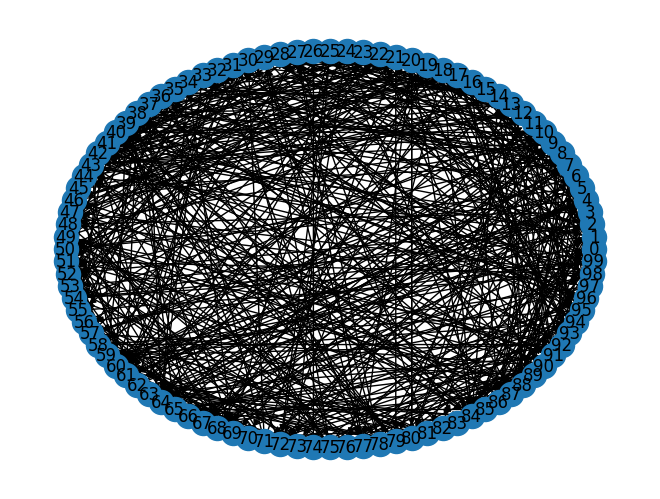

In [40]:
import random
import networkx as nx

# Function to generate random link data
def generate_link_data(num_nodes):
    link_data = {}
    for node in range(num_nodes):
        num_links = random.randint(1, min(10, num_nodes - 1))
        links = random.sample(range(num_nodes), num_links)
        links = [link for link in links if link != node]
        link_data[node] = links
    link_graph = nx.DiGraph(link_data)
    labels = dict((n, str(n)) for n in link_graph.nodes())
    nx.draw_circular(link_graph, labels = labels)
    return link_data

# Function to write link data to a text file
def write_link_data_to_file(link_data, filename):
    with open(filename, 'w') as file:
        for node, links in link_data.items():
            file.write("{}: {}\n".format(node, links))

# Main function
def main():
    num_nodes = 100
    link_data = generate_link_data(num_nodes)

    # Write link data to a file
    write_link_data_to_file(link_data, 'question3.txt')

    print("File ''question3.txt' created successfully.")

if __name__ == "__main__":
    main()


### Loading the input file and creating adjacency list

In [46]:
lines = sc.textFile('question3.txt')
links = lines.map(lambda line: (line.split(":")[0].strip(), eval(line.split(":")[1].strip()))).cache()
links.take(5)

[('0', [11, 15, 74, 79, 76]),
 ('1', [78, 44, 11, 29, 42, 28, 53]),
 ('2', [61, 97, 42, 52, 89, 54]),
 ('3', [8, 87, 68, 85]),
 ('4', [60, 37, 95])]

### Initializing each page's rank

In [47]:
N = links.count()  #Total number of pages
ranks = links.map(lambda node: (node[0], 1.0 / N))  #Initial rank is 1/N for each page

In [48]:
ranks.take(5)

[('0', 0.01), ('1', 0.01), ('2', 0.01), ('3', 0.01), ('4', 0.01)]

### Iterative calculation with convergence checking

In [49]:
total_change = float("inf") #Initial high value for total_change to enter the while loop
convergence_threshold=1e-6 #threshold
damping_factor=0.85
iteration = 0 # Iterative calculation with convergence checking
while total_change > convergence_threshold:
        iteration += 1
        print(f"Iteration {iteration}")
        previous_ranks = ranks # Saving the previous ranks for comparison
        # Joining links with ranks to calculate contributions
        contribs = links.join(ranks).flatMap(lambda node: [(str(neighbor), node[1][1] / len(node[1][0])) for neighbor in node[1][0]])
        # Aggregating contributions and applying the damping factor
        ranks = contribs.reduceByKey(lambda a, b: a + b).mapValues(lambda rank: damping_factor * rank + (1 - damping_factor) / N)
        # Calculating to  tal change between current and previous ranks
        total_change = previous_ranks.join(ranks).mapValues(lambda x: abs(x[0] - x[1])).values().sum()
        print(f"Total change in this iteration: {total_change}")


Iteration 1
Total change in this iteration: 0.3499099206349206
Iteration 2
Total change in this iteration: 0.13900383701026706
Iteration 3
Total change in this iteration: 0.05647556081692502
Iteration 4
Total change in this iteration: 0.020444585651087067
Iteration 5
Total change in this iteration: 0.007917675142225074
Iteration 6
Total change in this iteration: 0.003593247529416112
Iteration 7
Total change in this iteration: 0.0013771290512813897
Iteration 8
Total change in this iteration: 0.0006847180503465849
Iteration 9
Total change in this iteration: 0.0004362252744981496
Iteration 10
Total change in this iteration: 0.0003474254194247928
Iteration 11
Total change in this iteration: 0.0002953116065111112
Iteration 12
Total change in this iteration: 0.00025101486553443094
Iteration 13
Total change in this iteration: 0.00021336263570425392
Iteration 14
Total change in this iteration: 0.00018135824034861726
Iteration 15
Total change in this iteration: 0.0001541545042963357
Iteration 1

### Loading the output to a file and finding highest and lowest ranks



In [50]:
ranks_list = ranks.collect()

with open("output_3.txt", "w") as outfile:
    outfile.write("[")
    outfile.write(", ".join(f"({node}, {rank})" for node, rank in sorted(ranks_list)))
    outfile.write("]")

# Finding nodes with the highest and lowest PageRank
highest_rank_node = max(ranks_list, key=lambda x: x[1])
lowest_rank_node = min(ranks_list, key=lambda x: x[1])

print("Node with the highest PageRank:", highest_rank_node)
print("Node with the lowest PageRank:", lowest_rank_node)

Node with the highest PageRank: ('38', 0.035226065530354594)
Node with the lowest PageRank: ('16', 0.0023927988576355743)


In [51]:
# Get your authtoken from https://dashboard.ngrok.com/auth
authtoken = "2olKEpwS6NnbNhIypsOhhpYLxqF_3ZEABQt6eE5XzFZBfcMav"
ngrok.set_auth_token(authtoken)
spark = SparkSession.builder.master("local[*]").appName("PageRankApp").getOrCreate()
public_url = ngrok.connect(addr='http://localhost:4040')
print(f"Spark UI available at: {public_url}")

Spark UI available at: NgrokTunnel: "https://b412-34-125-137-31.ngrok-free.app" -> "http://localhost:4040"


In [52]:
sc.stop()